# 🧠 Advanced EDA Exercise (3-Hour Challenge)
**Dataset:** UCI Wine Quality Dataset – Red Wine  
**Tools:** NumPy, Pandas, Matplotlib, Seaborn

## 📝 Instructions
Download the file `winequality-red.csv` and complete the following tasks.

#✅ Part 1: Advanced Data Wrangling – Extension Tasks
📦 Step 1: Load the Data and Display Info

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("winequality-red.csv", sep=';')

# Display top 3 and bottom 3 rows
print("Top 3 rows:")
display(df.head(3))
print("Bottom 3 rows:")
display(df.tail(3))

# Check memory usage
print("\nMemory usage before optimization (in MB):")
print(df.memory_usage(deep=True).sum() / 1024 ** 2)

# Optimize dtypes for float64 -> float32
df_optimized = df.copy()
for col in df_optimized.select_dtypes(include='float64').columns:
    df_optimized[col] = df_optimized[col].astype('float32')

print("\nMemory usage after optimization (in MB):")
print(df_optimized.memory_usage(deep=True).sum() / 1024 ** 2)


Top 3 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


Bottom 3 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6



Memory usage before optimization (in MB):
0.14651870727539062

Memory usage after optimization (in MB):
0.0794219970703125


#🔍 Step 2: Detect and Remove

2.1 Remove Exact Duplicates

In [ ]:
print("Shape before removing duplicates:", df_optimized.shape)
df_optimized = df_optimized.drop_duplicates()
print("Shape after removing duplicates:", df_optimized.shape)


Shape before removing duplicates: (1599, 12)
Shape after removing duplicates: (1359, 12)


#2.2 Remove rows with more than one standard deviation below mean in >3 columns

In [ ]:
# Calculate means and stds for all numerical columns
mean_vals = df_optimized.mean()
std_vals = df_optimized.std()

# Boolean DataFrame: True if value < (mean - 1*std)
below_std = df_optimized < (mean_vals - std_vals)

# Count how many columns in each row satisfy the condition
below_std_count = below_std.sum(axis=1)

# Remove rows with more than 3 such values
df_optimized = df_optimized[below_std_count <= 3]
print("Shape after removing rows below 1 std in >3 columns:", df_optimized.shape)


Shape after removing rows below 1 std in >3 columns: (1293, 12)


#⚙️ Step 3: Create New Features

3.1 acid_sugar_ratio = fixed_acidity / residual_sugar

In [ ]:
df_optimized['acid_sugar_ratio'] = df_optimized['fixed acidity'] / df_optimized['residual sugar'].replace(0, np.nan)

3.2 sulfate_acidity = sulphates / volatile_acidity

In [ ]:
df_optimized['sulfate_acidity'] = df_optimized['sulphates'] / df_optimized['volatile acidity'].replace(0, np.nan)

3.3 Cap values in chlorides and volatile_acidity at 99th percentile

In [ ]:
for col in ['chlorides', 'volatile acidity']:
    cap_value = np.percentile(df_optimized[col], 99)
    df_optimized[col] = np.where(df_optimized[col] > cap_value, cap_value, df_optimized[col])
    print(f"Capped {col} at 99th percentile value: {cap_value}")

Capped chlorides at 99th percentile value: 0.36911505460739136
Capped volatile acidity at 99th percentile value: 1.010799527168274


#✅ Final Step: Preview Cleaned Data

In [ ]:
df_optimized.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acid_sugar_ratio,sulfate_acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3.894737,0.800000
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,3.000000,0.772727
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3.391304,0.855263
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5.894737,2.071429
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,4.111111,0.848485


#📊 Part 2: Multi-level Grouping and Aggregation (30 mins)
🔹 Step 4: Bin the quality Column into Categorical Labels

In [ ]:
# Define quality bins
bins = [0, 4, 6, 10]
labels = ['Low', 'Medium', 'High']

# Apply binning
df_optimized['quality_group'] = pd.cut(df_optimized['quality'], bins=bins, labels=labels, right=True)

# Confirm distribution
df_optimized['quality_group'].value_counts()



,count
quality_group,
Medium,1075
High,171
Low,47


🔹 Step 5: GroupBy Aggregation

5.1 Mean, Std, and IQR for alcohol, sulphates, and citric_acid

In [ ]:
def iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

agg_funcs = {
    'alcohol': ['mean', 'std', iqr],
    'sulphates': ['mean', 'std', iqr],
    'citric acid': ['mean', 'std', iqr]
}

grouped_stats = df_optimized.groupby('quality_group').agg(agg_funcs)
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]  # Flatten multi-index
grouped_stats

/tmp/ipython-input-14-1694092337.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df_optimized.groupby('quality_group').agg(agg_funcs)


,alcohol_mean,alcohol_std,alcohol_iqr,sulphates_mean,sulphates_std,sulphates_iqr,citric acid_mean,citric acid_std,citric acid_iqr
quality_group,,,,,,,,,
Low,10.125532,0.944024,1.45,0.620426,0.248114,0.085,0.217447,0.221629,0.34
Medium,10.239628,0.965422,1.30,0.651516,0.168330,0.150,0.264028,0.188290,0.32
High,11.523490,1.023286,1.40,0.751053,0.132825,0.160,0.374971,0.195476,0.19


5.2 Mean Difference Between High and Low Wines

In [ ]:
mean_vals = df_optimized.groupby('quality_group')[['alcohol', 'volatile acidity']].mean()

mean_diff_alcohol = mean_vals.loc['High', 'alcohol'] - mean_vals.loc['Low', 'alcohol']
mean_diff_volatile = mean_vals.loc['High', 'volatile acidity'] - mean_vals.loc['Low', 'volatile acidity']

print(f"Mean difference in alcohol (High - Low): {mean_diff_alcohol:.3f}")
print(f"Mean difference in volatile acidity (High - Low): {mean_diff_volatile:.3f}")

Mean difference in alcohol (High - Low): 1.398
Mean difference in volatile acidity (High - Low): -0.264


/tmp/ipython-input-16-3838686186.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_vals = df_optimized.groupby('quality_group')[['alcohol', 'volatile acidity']].mean()


🔹 Step 6: Multi-Index Pivot Table

Pivot:

Index: quality_group

Columns: Quantile bins of alcohol

Values: density (mean)

In [ ]:
# Create alcohol quantile bins
df_optimized['alcohol_bin'] = pd.qcut(df_optimized['alcohol'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Pivot Table
pivot_table = df_optimized.pivot_table(
    index='quality_group',
    columns='alcohol_bin',
    values='density',
    aggfunc='mean'
)

pivot_table


/tmp/ipython-input-17-1188704684.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_optimized.pivot_table(


alcohol_bin,Q1,Q2,Q3,Q4
quality_group,,,,
Low,0.997592,0.997404,0.996958,0.996026
Medium,0.997514,0.997237,0.996906,0.995298
High,0.997883,0.997569,0.997159,0.995408


## 🎨 Part 3: Advanced Visual Exploration (45 mins)
📈 Step 7: Customized Visuals

7.1 KDE Plots of alcohol by quality_group

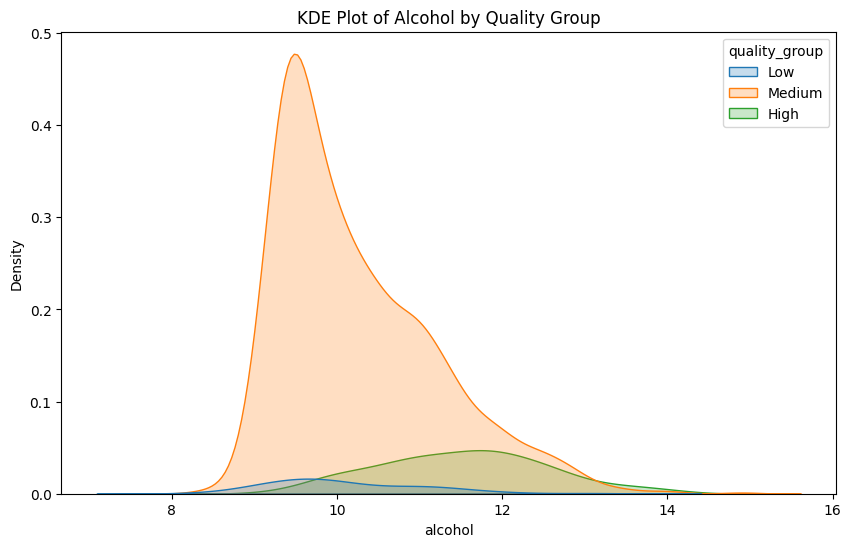

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_optimized, x='alcohol', hue='quality_group', fill=True)
plt.title('KDE Plot of Alcohol by Quality Group')
plt.show()


7.2 Violin Plot of residual_sugar grouped by quality_group, hue = binned pH

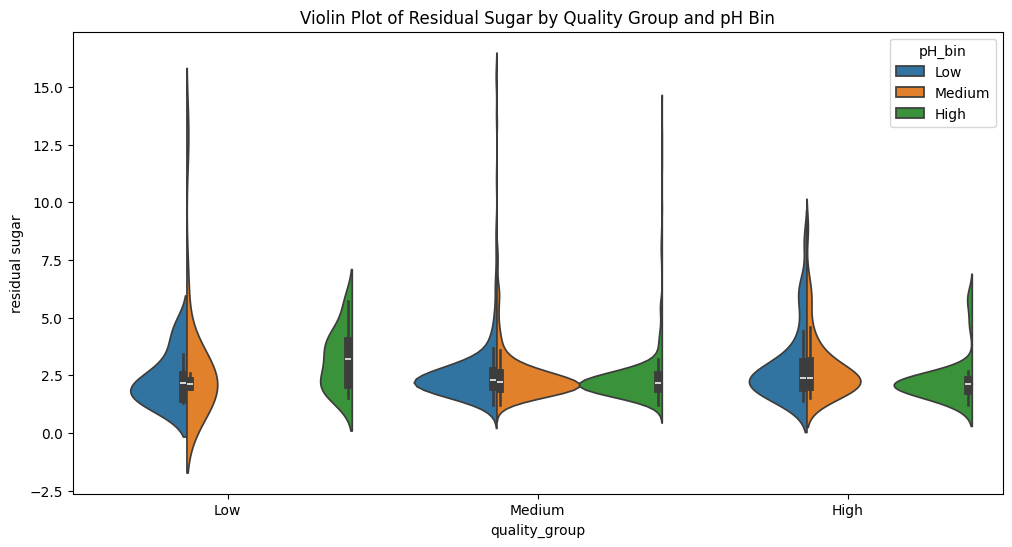

In [ ]:
df_optimized['pH_bin'] = pd.qcut(df_optimized['pH'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_optimized, x='quality_group', y='residual sugar', hue='pH_bin', split=True)
plt.title('Violin Plot of Residual Sugar by Quality Group and pH Bin')
plt.show()

🔥 Step 8: Correlation Heatmaps (Pearson & Spearman)

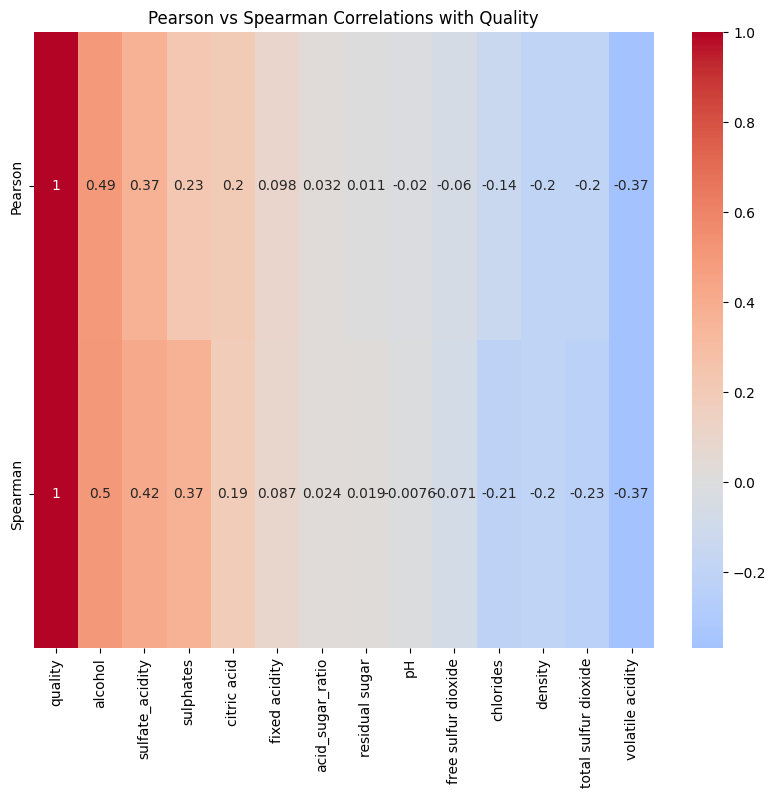

In [ ]:
import numpy as np

# Drop non-numeric columns before calculating correlation
df_numeric = df_optimized.select_dtypes(include=np.number)

# Pearson and Spearman correlations
pearson_corr = df_numeric.corr(method='pearson')['quality'].sort_values(ascending=False)
spearman_corr = df_numeric.corr(method='spearman')['quality'].sort_values(ascending=False)

# Combine into one DataFrame
corr_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
}).dropna()

# Heatmap-style bar plot
corr_df_sorted = corr_df.sort_values(by='Pearson', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df_sorted.T, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson vs Spearman Correlations with Quality')
plt.show()

📊 Step 9: Diverging Bar Chart of Z-scores by Quality

/tmp/ipython-input-25-378765654.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df_optimized.groupby('quality_group')[features].mean()


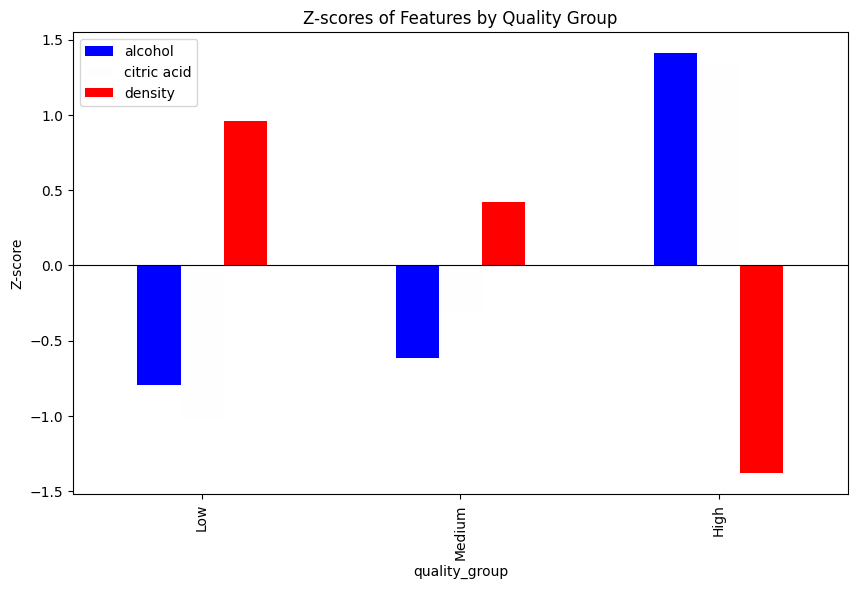

In [ ]:
from scipy.stats import zscore

# Group by quality_group and compute mean
features = ['alcohol', 'citric acid', 'density']
group_means = df_optimized.groupby('quality_group')[features].mean()

# Z-score transform across rows
z_scores = group_means.apply(zscore, axis=0)

# Plot
z_scores.plot(kind='bar', figsize=(10, 6), title='Z-scores of Features by Quality Group', colormap='bwr')
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Z-score")
plt.show()

## Part 4: Outlier Strategies and Detection (30 mins)
10: Outlier Detection on total_sulfur_dioxide

10.1 IQR Method

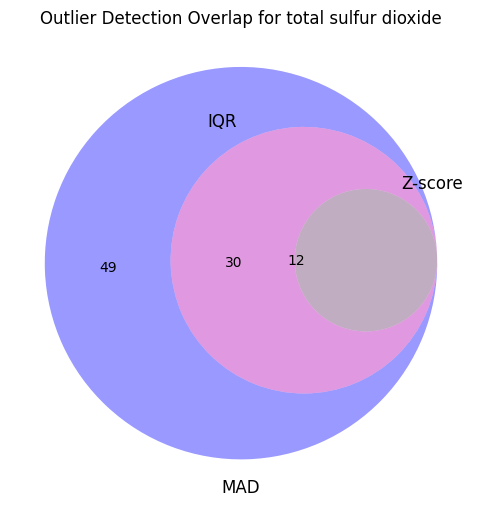

Extreme Outliers Detected by All Methods: 12


/tmp/ipython-input-30-140912364.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  before_means = df_optimized.groupby('quality_group')['total sulfur dioxide'].mean()
/tmp/ipython-input-30-140912364.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  after_means = df_cleaned.groupby('quality_group')['total sulfur dioxide'].mean()


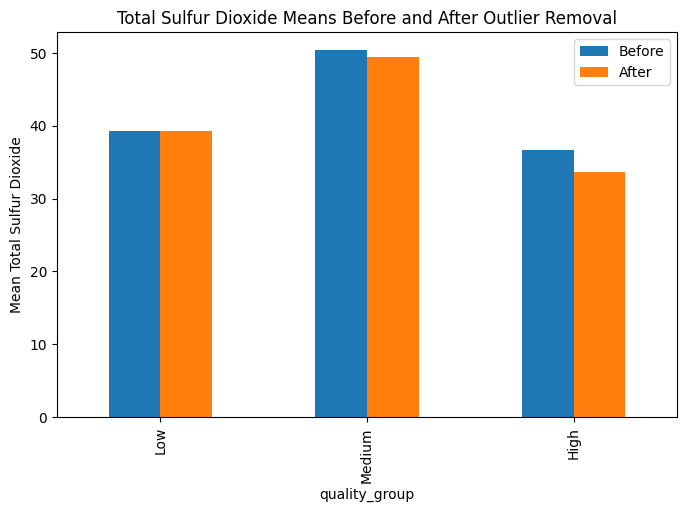

In [ ]:
from scipy.stats import zscore

#10.1 IQR Method
Q1 = df_optimized['total sulfur dioxide'].quantile(0.25)
Q3 = df_optimized['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = df_optimized[
    (df_optimized['total sulfur dioxide'] < Q1 - 1.5 * IQR) |
    (df_optimized['total sulfur dioxide'] > Q3 + 1.5 * IQR)
].index

#10.2 Z-score Method
z_scores = zscore(df_optimized['total sulfur dioxide'])
z_outliers = df_optimized[np.abs(z_scores) > 3].index


#10.3 MAD (Median Absolute Deviation)

median = df_optimized['total sulfur dioxide'].median()
mad = np.median(np.abs(df_optimized['total sulfur dioxide'] - median))
mad_outliers = df_optimized[
    np.abs(df_optimized['total sulfur dioxide'] - median) / mad > 3.5
].index


#11: Compare Outlier Sets and Venn Diagram

from matplotlib_venn import venn3
import matplotlib.pyplot as plt

set_iqr = set(iqr_outliers)
set_z = set(z_outliers)
set_mad = set(mad_outliers)

plt.figure(figsize=(8, 6))
venn3([set_iqr, set_z, set_mad], ('IQR', 'Z-score', 'MAD'))
plt.title('Outlier Detection Overlap for total sulfur dioxide')
plt.show()

#12: Remove Extreme Outliers and Compare Means
#12.1 Intersection of All 3 Methods
intersection_idx = list(set_iqr & set_z & set_mad)
print("Extreme Outliers Detected by All Methods:", len(intersection_idx))


#12.2 Group Means Before and After Removal
before_means = df_optimized.groupby('quality_group')['total sulfur dioxide'].mean()

df_cleaned = df_optimized.drop(index=intersection_idx)
after_means = df_cleaned.groupby('quality_group')['total sulfur dioxide'].mean()

comparison_df = pd.DataFrame({
    'Before': before_means,
    'After': after_means
})

comparison_df.plot(kind='bar', figsize=(8, 5), title='Total Sulfur Dioxide Means Before and After Outlier Removal')
plt.ylabel("Mean Total Sulfur Dioxide")
plt.show()

## ⚙️ Part 5: Functionalized Insights + Summary (30 mins)

🔁 Step 13: feature_stats(df, col) Function

In [ ]:
def feature_stats(df, col):
    stats = {
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurtosis(),
        '95th Percentile': df[col].quantile(0.95),
        'Missing %': df[col].isnull().mean() * 100
    }
    return pd.Series(stats, name=col)

# Example usage:
feature_stats(df_optimized, 'alcohol')


,alcohol
Skewness,0.889716
Kurtosis,0.251744
95th Percentile,12.500000
Missing %,0.000000


In [ ]:
#⏱️ Step 14: Decorator @timeit for Plot Functions

import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"\n⏱️ Execution Time: {func.__name__} took {end - start:.2f} seconds")
        return result
    return wrapper


Top 3 Correlated Features with quality: ['alcohol', 'sulfate_acidity', 'volatile acidity']


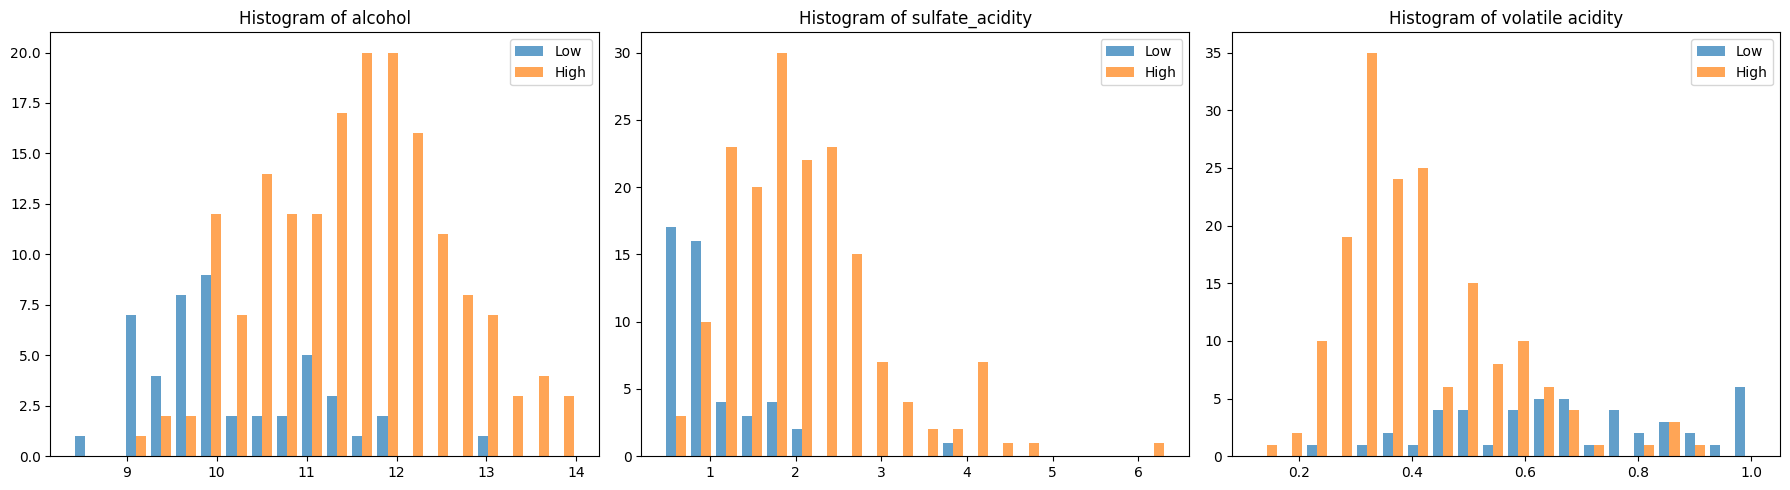


⏱️ Execution Time: plot_dashboard took 0.94 seconds


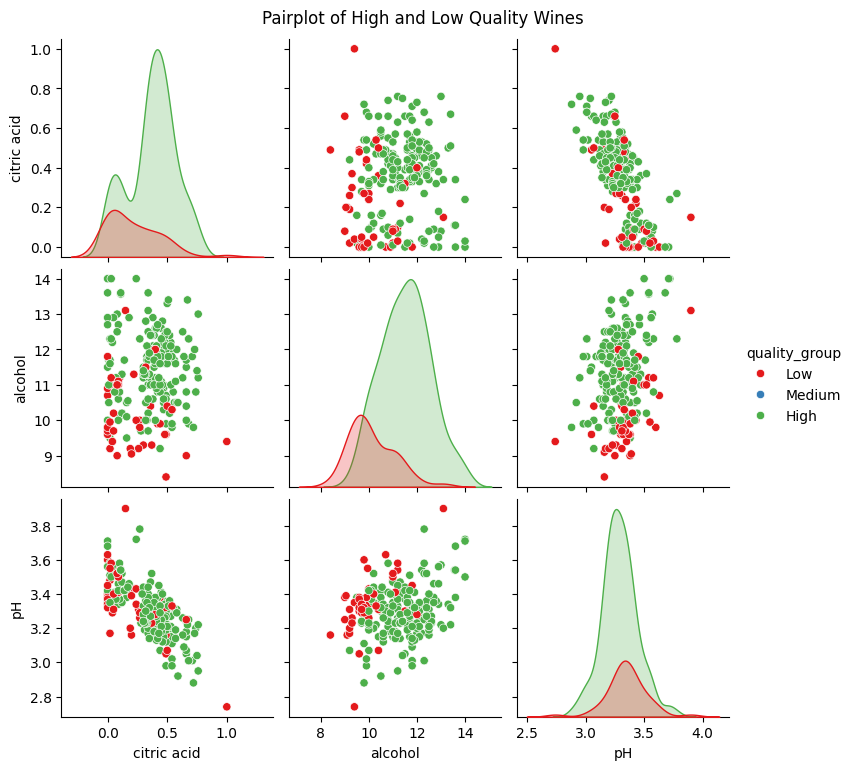


⏱️ Execution Time: plot_pairplot took 1.93 seconds


In [ ]:
#📊 Step 15: Final Dashboard with Subplots
#15.1 Top 3 features most correlated with quality

# Get top 3 correlations with quality
correlations = df_numeric.corr()['quality'].drop('quality').abs().sort_values(ascending=False)
top3_features = correlations.head(3).index.tolist()
print("Top 3 Correlated Features with quality:", top3_features)


#15.2 Dashboard with Histograms using matplotlib

@timeit
def plot_dashboard(df):
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, feature in enumerate(top3_features):
        axes[i].hist([df[df['quality_group']=='Low'][feature], df[df['quality_group']=='High'][feature]],
                     label=['Low', 'High'], bins=20, alpha=0.7)
        axes[i].set_title(f"Histogram of {feature}")
        axes[i].legend()
    plt.tight_layout()
    plt.show()

plot_dashboard(df_optimized)


#15.3 Pairplot for citric_acid, alcohol, and pH for High and Low only

@timeit
def plot_pairplot(df):
    import seaborn as sns

    filtered = df[df['quality_group'].isin(['High', 'Low'])]
    sns.pairplot(data=filtered, vars=['citric acid', 'alcohol', 'pH'], hue='quality_group', palette='Set1')
    plt.suptitle("Pairplot of High and Low Quality Wines", y=1.02)
    plt.show()

plot_pairplot(df_optimized)